In [33]:
from mpl_toolkits import mplot3d

%matplotlib notebook

import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

os.chdir("/Users/Aritomo/Documents/kivy")

print("-------")
print(os.getcwd())

#fig = plt.figure()
#ax = plt.axes(projection="3d")


with open('Enose4Data.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile, names=['MQ-3', 'MQ-136', 'MQ-137', 'MQ-5', 'sens5', 'sens6','target'],skiprows = 0)
    #next(df)
    
    
    
    features = ['MQ-3', 'MQ-137', 'MQ-5', 'sens5', 'sens6']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['target']].values
    # Standardizing the features
    #x = StandardScaler().fit_transform(x)
    print("-------")
    #print(df)
    #print(df.loc[:, features].values)
    #print(df.loc[:,['target']].values)
    
    sensor1list = (df.loc[:, features[0]].values)
    np.average(sensor1list)
    
    #print((len(sensor1list)-1)/60)
    numOfAvgs = int(np.floor(len(sensor1list)/60))
    print(numOfAvgs)
    avgDf = pd.DataFrame(columns = ['MQ-3', 'MQ-137', 'MQ-5', 'sens5', 'sens6','target'])
    print("-------")
    print(df)
    d=[]
    d2=[]
    for y in range(len(features)):
        sensorList = df.loc[:, features[y]].values
        d1=[]
        for x in range(numOfAvgs):
            thisAvg = np.average(sensorList[60*(x):59+60*x])
            column = features[y]
            d1.append(thisAvg)
            if(y==0):
                targList = df.loc[:,'target'].values
                d2.append(targList[x*60+5])
        avgDf[features[y]] = d1
    print(d2)
    avgDf['target'] = d2
    print(avgDf)

-------
/Users/Aritomo/Documents/kivy
-------
30
-------
      MQ-3  MQ-136  MQ-137  MQ-5  sens5  sens6      target
0      104      12      13    89      8     72  LemonGrass
1      104      12      13    89      7     73  LemonGrass
2      105      12      13    89      8     72  LemonGrass
3      105      12      13    90      8     72  LemonGrass
4      107      12      13    90      7     72  LemonGrass
...    ...     ...     ...   ...    ...    ...         ...
1795   225      13      15    81      9     73      Orange
1796   223      13      15    81     11     72      Orange
1797   224      15      12    81      8     73      Orange
1798   220      13      15    80      9     74      Orange
1799   224      13      15    81     11     72      Orange

[1800 rows x 7 columns]
['LemonGrass', 'LemonGrass', 'LemonGrass', 'LemonGrass', 'LemonGrass', 'Eucalyptus', 'Eucalyptus', 'Eucalyptus', 'Eucalyptus', 'Eucalyptus', 'Peppermint', 'Peppermint', 'Peppermint', 'Peppermint', 'Peppermint',

In [34]:
features = ['MQ-3', 'MQ-137', 'MQ-5', 'sens5', 'sens6']
# Separating out the features
x = avgDf.loc[:, features].values
# Separating out the target
y = avgDf.loc[:,['target']].values
# Standardizing the features
scaler = StandardScaler()
oldX = x
x = scaler.fit_transform(x)
means = scaler.mean_ 
var = scaler.var_
print(means)
print(var)

print(type(means))
print(type(var))

[166.37231638  14.13785311  81.09830508   8.26836158  71.52429379]
[2.79313436e+03 1.58327556e+00 1.30084535e+01 4.90148106e-01
 1.21464509e+01]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


    principal component 1  principal component 2      target
0                2.219341              -1.239442  LemonGrass
1                2.235584              -0.804440  LemonGrass
2                2.115986              -0.425018  LemonGrass
3                1.967255              -0.650929  LemonGrass
4                2.208209              -0.905719  LemonGrass
5               -1.505009               0.022600  Eucalyptus
6               -1.388102               0.537990  Eucalyptus
7               -1.005873               1.038070  Eucalyptus
8               -0.792489               1.185444  Eucalyptus
9               -0.547836               0.733975  Eucalyptus
10              -1.568856               0.157561  Peppermint
11              -0.316332               0.629401  Peppermint
12               0.708192               1.741953  Peppermint
13               1.014577               1.979279  Peppermint
14               1.157270               2.032772  Peppermint
15               2.55231

<IPython.core.display.Javascript object>


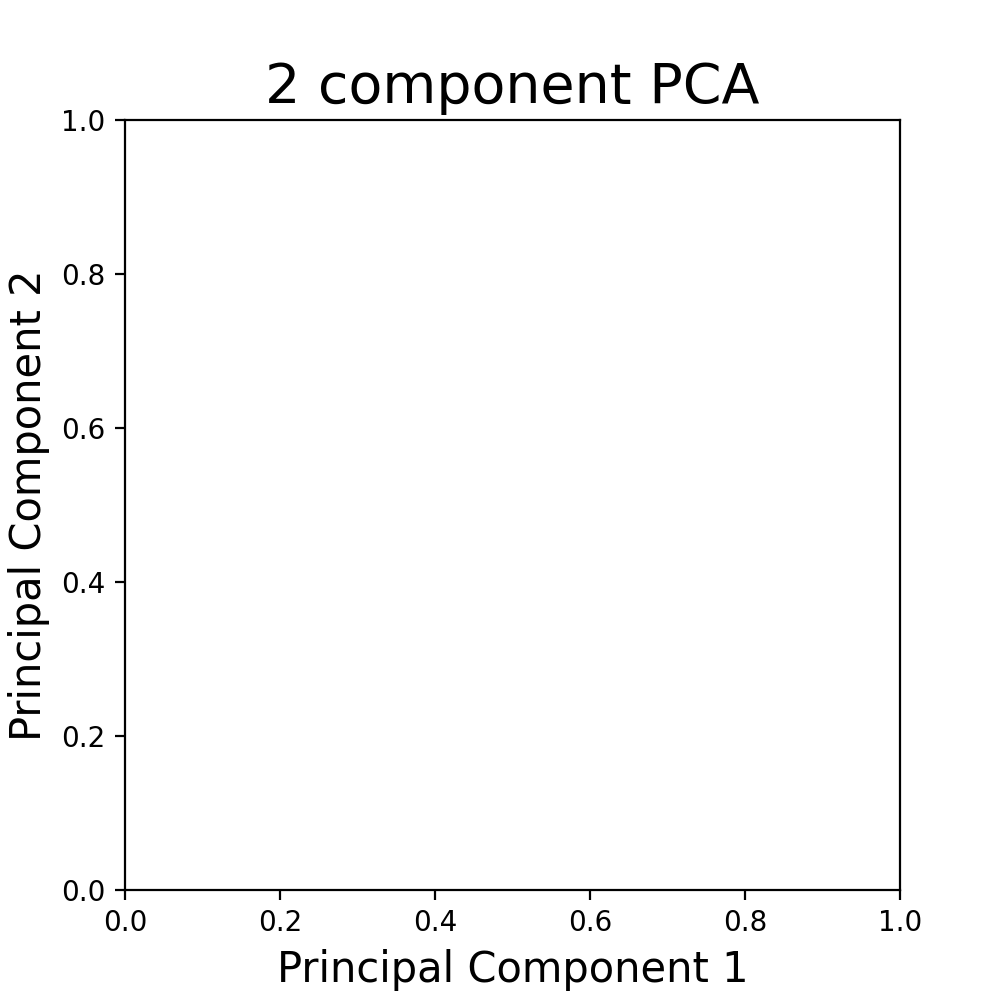

<IPython.core.display.Javascript object>


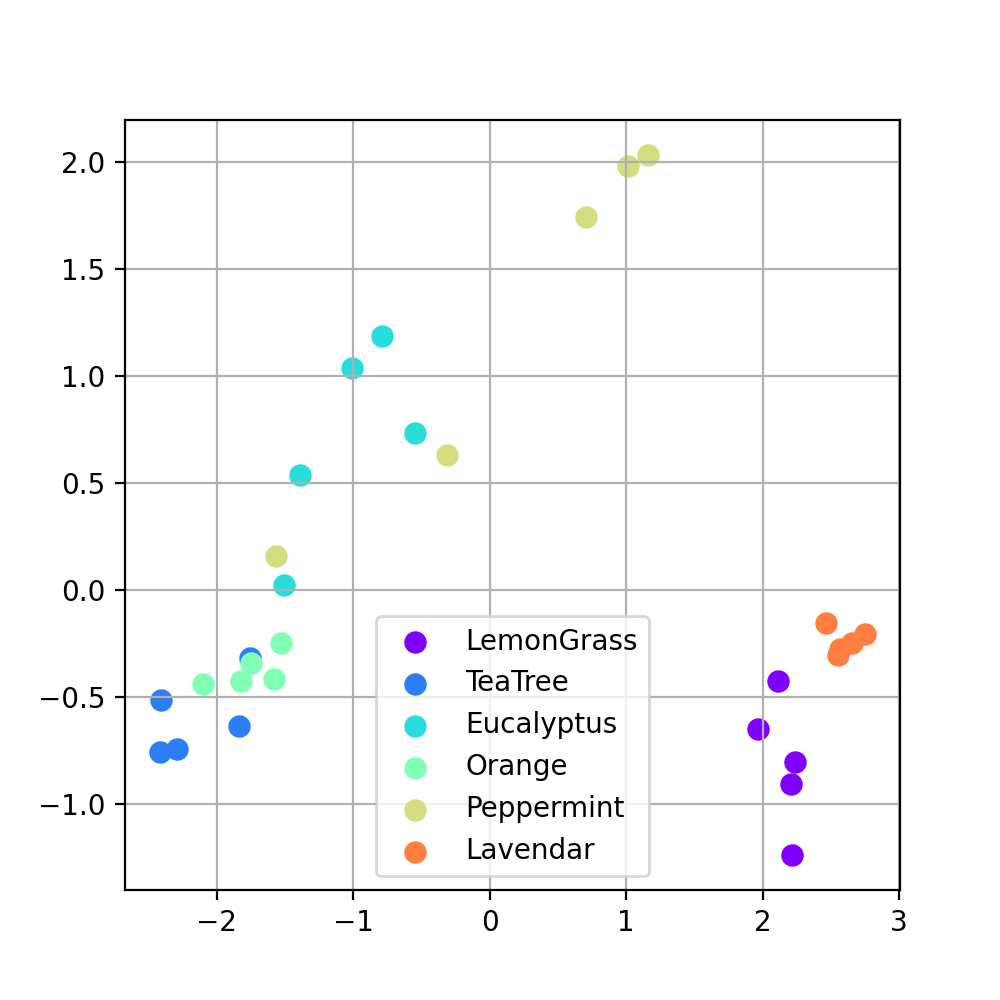

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: target, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25    False
26    False
27    False
28    False
29    False
Name: target, dtype: bool
0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False


In [35]:
%matplotlib notebook

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, avgDf[['target']]], axis = 1)
print(finalDf)

components = pca.components_
print(components)
print(type(components))
labelsNames = []
labelsNums = []

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 

targets = ['LemonGrass','TeaTree', 'Eucalyptus', 'Orange', 'Peppermint', 'Lavendar']
colors = cm.rainbow(np.linspace(0, 1, 7))

num_trials = 5
i = 0
for target, color in zip(targets,colors):
    i+=1
    for q in range(num_trials):
        labelsNums.append(i-1)
        labelsNames.append(target)
    indicesToKeep = finalDf['target'] == target
    print(indicesToKeep)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)

ax.legend(targets)
ax.grid()
plt.show()
#print(labelsNames)
#print(labelsNums)
print(avgDf.loc[indicesToKeep, 'MQ-3'])

<IPython.core.display.Javascript object>


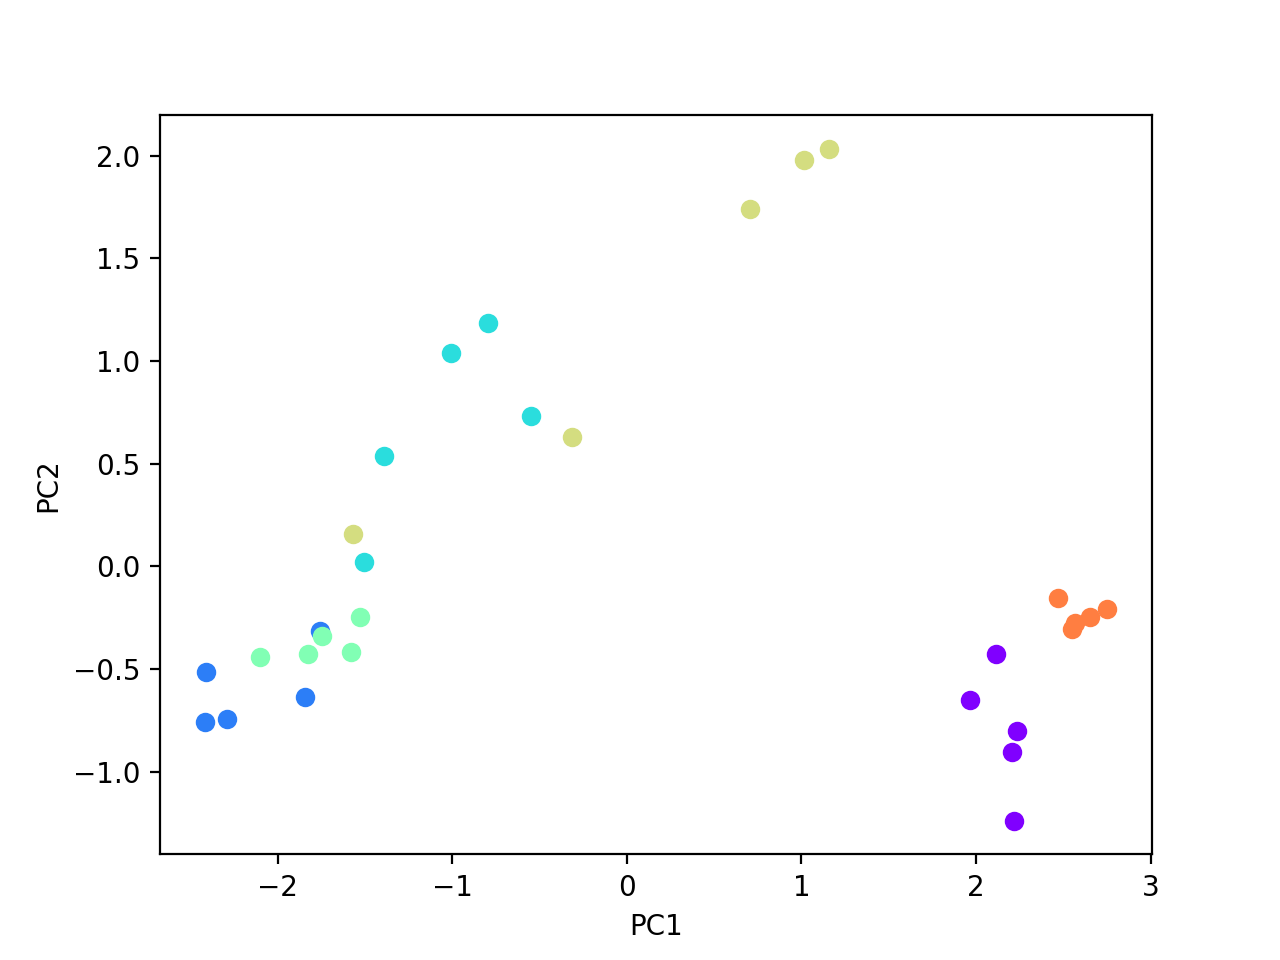

In [32]:
data_as_nparray = finalDf.values

X = data_as_nparray[:,0:2]
true_label = data_as_nparray[:,2]
#print(X.shape, true_label.shape)
#print(X[0:5,:], true_label[0:5])

#print(X)
#print(true_label)

plt.figure()

for target, color in zip(targets,colors):
    idx = np.where(true_label == target)
    plt.plot(X[idx,0], X[idx,1], 'o', color = color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

In [22]:
num_smells = len(targets)#5
model = KMeans(n_clusters = num_smells)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
cluster_centers = model.cluster_centers_
print(cluster_centers)
plt.figure()
labelsList = []
i = 0

conversion = []
labelsNames, labelNums =  [], []
for i, (target, color) in enumerate(zip(targets,colors)):
    idx = np.where(true_label == target)
    
    plt.plot(X[idx,0], X[idx,1], 'o', color = color, 
             alpha = 1)
    plt.plot(cluster_centers[i,0], cluster_centers[i,1], 'v',
             ms = 10, color = color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    centerRnd = int(np.round(cluster_centers[i,0]*10))
    print(centerRnd)
    
        
print(conversion)

#plt.legend()

[[-1.66893576 -0.27562061]
 [ 2.59860903 -0.23802645]
 [ 0.96001281  1.9180013 ]
 [ 2.14927508 -0.80510942]
 [-0.81012664  0.82497602]
 [-2.30433494 -0.61455994]]


<IPython.core.display.Javascript object>

-17
26
10
21
-8
-23
[]


In [24]:
95113

95113

In [25]:
#labels = np.zeros_like(model)
#for i in range(6):
    #mask = (model == i)
    #labels[mask] = mode(digits.target[mask])[0]

import pickle
pickle.dump(model, open("model.pkl", "wb"))
pred_labels = model.labels_
print(pred_labels)
print(labelsNums)
for lb in pred_labels:
    centerRnd = int(np.round(cluster_centers[lb,0]*10))
    if(centerRnd==21):
        print(5)
    if(centerRnd==-13):
        print(2)
    if(centerRnd==18):
        print(1)
    if(centerRnd==-7):
        print(3)
    if(centerRnd==-23):
        print(4)
    if(centerRnd==-10):
        print(0)

[3 3 3 3 3 0 4 4 4 4 0 4 2 2 2 1 1 1 1 1 5 5 5 0 0 0 0 5 0 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
5
5
5
5
5
4
4
4
4


In [26]:
with open('PleaseBeEucalyptus.txt', 'r') as csvfile:
    df = pd.read_csv(csvfile, names=['MQ-3', 'MQ-136', 'MQ-137', 'MQ-5', 'sens5', 'sens6'],skiprows = 0)
    
    features = ['MQ-3', 'MQ-5','sens6']

    x = df.loc[:, features].values
    
    sensor1list = (df.loc[:, features[0]].values)
    np.average(sensor1list)

    numOfAvgs = int(np.floor(len(sensor1list)/60))
    #print(numOfAvgs)
    avgDf = pd.DataFrame(columns = ['MQ-3', 'MQ-5', 'sens6'])
    print("-------")
    #print(df)

    d=[]
    d2=[]
    for y in range(len(features)):
        sensorList = df.loc[:, features[y]].values

        d1=[]
        for x in range(numOfAvgs):
            thisAvg = np.average(sensorList[60*(x):59+60*x])
            column = features[y]
            d1.append(thisAvg)
            
        avgDf[features[y]] = d1

    print(avgDf)
    
    x = avgDf.values
    
    
    #x is the averaged data from newly collected smell samples.
    means = np.array([166.37231638,81.09830508,71.52429379])
    var = np.array([2793.13435762,13.00845351,12.14645089])
    
    
    components = np.array([[-0.63914269,0.52454393,-0.56245025],
 [-0.06739724,-0.76670794,-0.63844854]])

    x = ((x-means)/var**0.5)
    comp1 = np.dot(x,components[0])
    
    comp2 = np.dot(x,components[1])

    #Comp1 and comp2 signify the two dimensions used after the PCA is performed.
    
    pr = ([comp1[0],comp2[0]],[comp1[0],comp2[0]])
    pr = model.predict(pr)
    
    
    
    '''21
        -16
        10
        -8
        26
        -22'''
    
    print(pr)
    ind = (pr[0])
    centerRnd = int(np.round(cluster_centers[pr[0],0]*10))
    if(centerRnd==21):
        print(5)
        print("LemonGrass")
    if(centerRnd==-16):
        print(2)
        print("Orange")
    if(centerRnd==10):
        print(1)
        print("Peppermint")
    if(centerRnd==-8):
        print(3)
        print("Eucalyptus")
    if(centerRnd==26):
        print(4)
        print("Lavendar")
    if(centerRnd==-22):
        print(0)
        print("TeaTree")
        
    plt.plot(comp1, comp2, 'o', alpha = 1)
    

-------
         MQ-3      MQ-5      sens6
0  188.016949  67.79661  57.644068
[2 2]
1
Peppermint


<IPython.core.display.Javascript object>


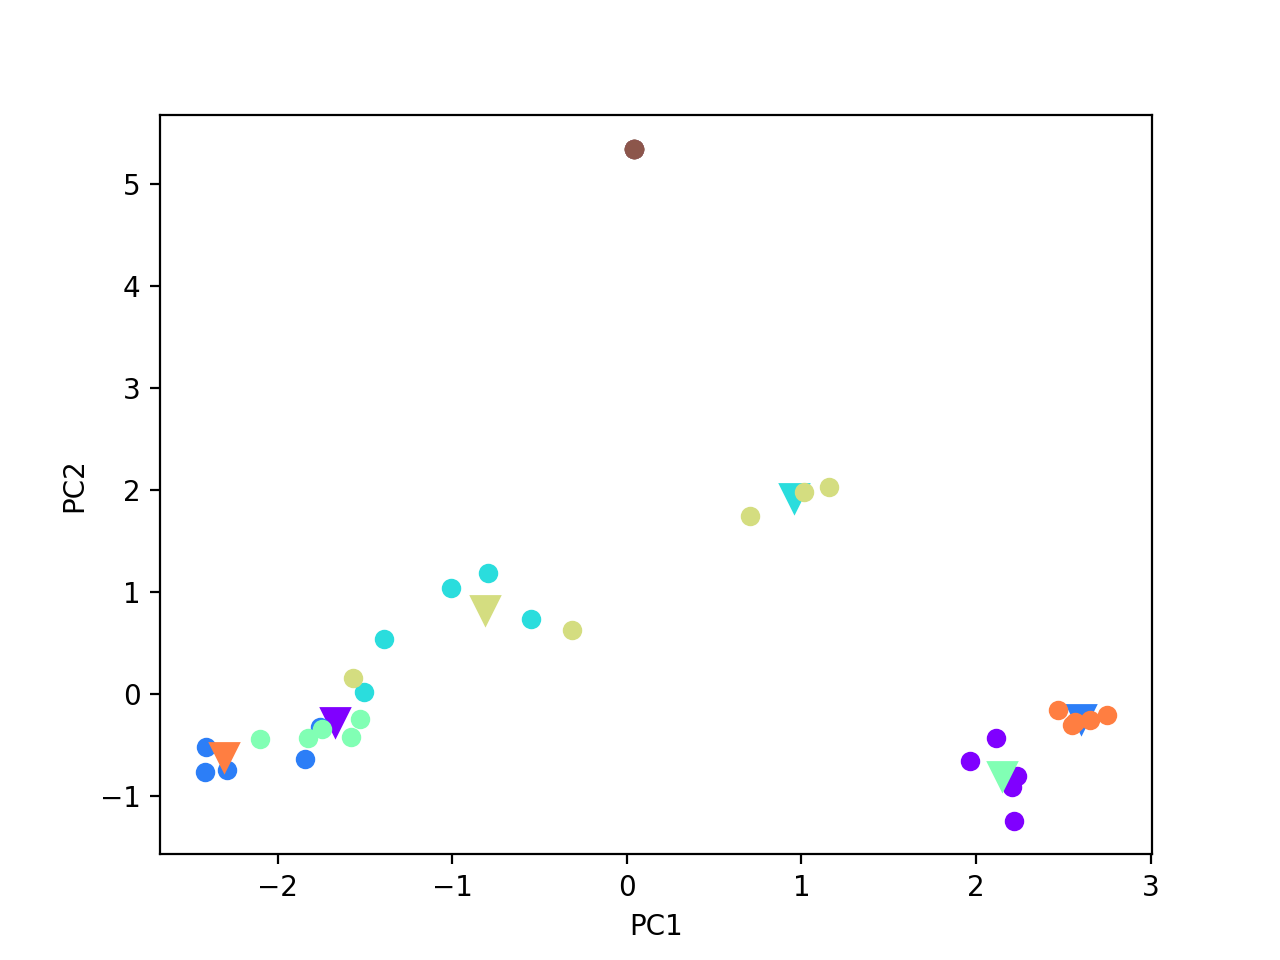

-17
26
10
21
-8
-23


<function matplotlib.pyplot.show(block=None)>

In [27]:
%matplotlib notebook
for i, (target, color) in enumerate(zip(targets,colors)):
    idx = np.where(true_label == target)
    plt.plot(X[idx,0], X[idx,1], 'o', color = color, alpha = 1)
    plt.plot(cluster_centers[i,0], cluster_centers[i,1], 'v',
             ms = 10, color = color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    centerRnd = int(np.round(cluster_centers[i,0]*10))
    print(centerRnd)
    plt.plot(comp1, comp2, 'o', alpha = 1)
    
plt.show

In [28]:
95113

95113